## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [4]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    # - This creates a list of all the pattern found in the input_text
    r = re.findall(pattern, input_txt)
    for word in r:
        # - re.sub(pattern_to_be_replaced, with_what_we_want_to_replace_the_pattern, the_input_text_from_which_we_want_to_replace_the_pattern)
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
# remove twitter handles (@user)
# - @[\w]* means that it will select @ and then any [\w]+. * here means that it will work even if there is no [\w] after @.
# So Normally an asterisk (*) means "0 or more of the previous thing".
# - Numpy vectorize function takes in a python function (pyfunc) and returns a vectorized version of the function.
# The vectorized version of the function takes a sequence of objects or NumPy arrays as input and evaluates the 
# Python function over each element of the input sequence. So here each row of the pandas series which is a sequence 
# will be passed one by one to the function remove_pattern.
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis

In [13]:
# !pip install wordcloud

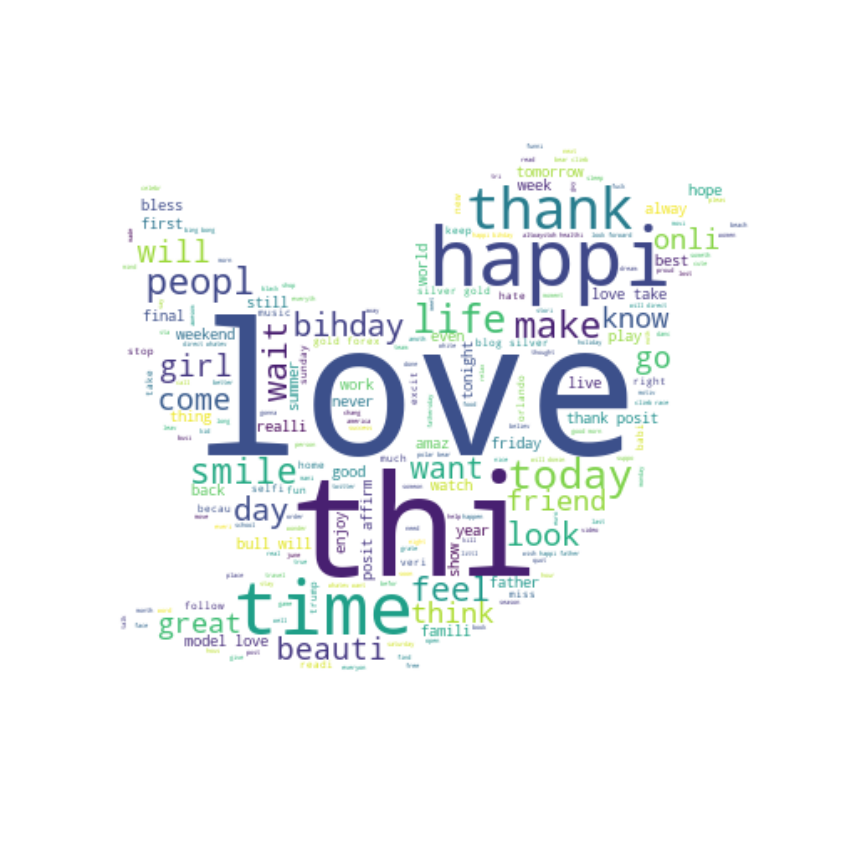

In [14]:
# visualize the frequent words
from PIL import Image
mask = np.array(Image.open('twitter icon.jpg'))
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(15,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

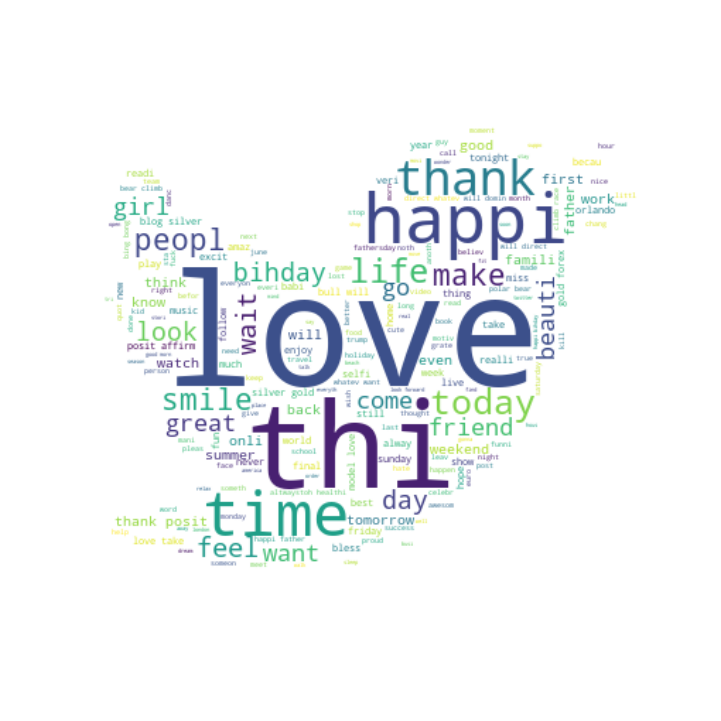

In [15]:
# frequent words visualization for +ve

from PIL import Image
mask = np.array(Image.open('twitter icon.jpg'))
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(20,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

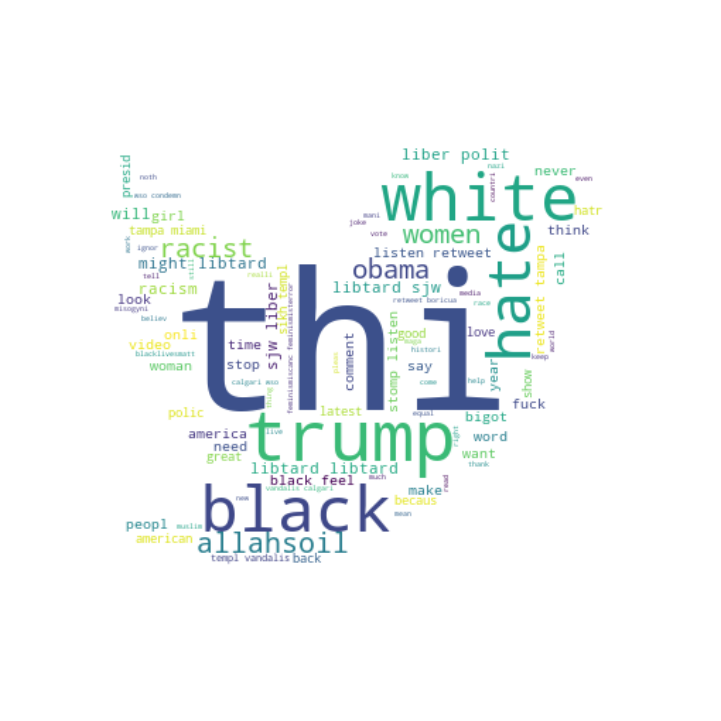

In [16]:
# frequent words visualization for -ve

from PIL import Image
mask = np.array(Image.open('twitter icon.jpg'))
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(20,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [18]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [19]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [20]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [21]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [22]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


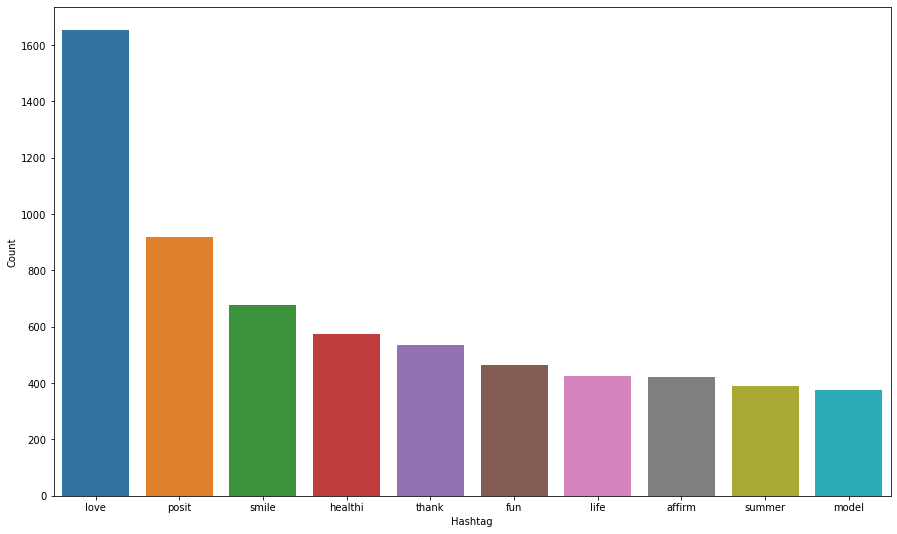

In [23]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [24]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


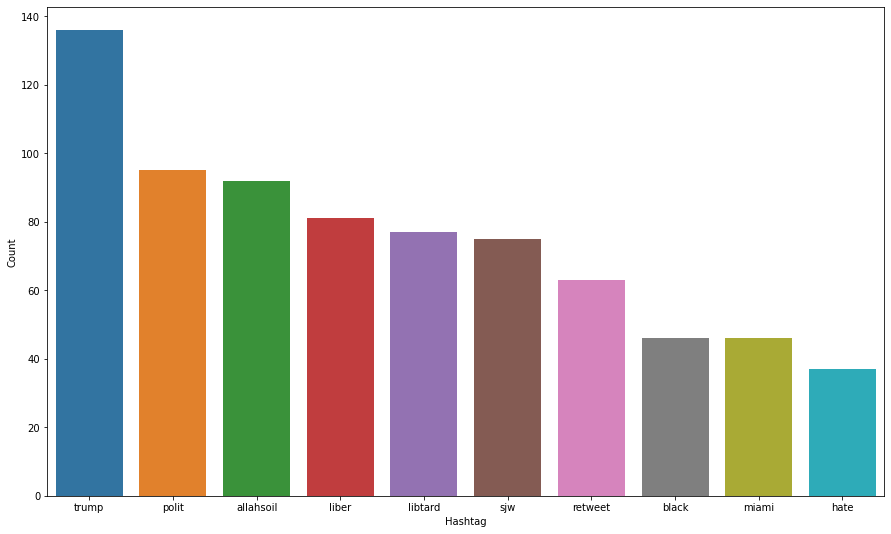

In [25]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_vectorizer = TfidfVectorizer(stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [30]:
bow

<31962x30389 sparse matrix of type '<class 'numpy.float64'>'
	with 201358 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

### LOGISTIC REGRESSION MODEL

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Train accuracy :', (lr.score(x_train, y_train))*100)
print('Test accuracy :', (lr.score(x_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(x_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(x_test)))

Train accuracy : 95.33603103750366
Test accuracy : 94.75660117632336

 CONFUSION MATRIX
[[7412   20]
 [ 399  160]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.89      0.29      0.43       559

    accuracy                           0.95      7991
   macro avg       0.92      0.64      0.70      7991
weighted avg       0.94      0.95      0.93      7991



### Naive Bayes Model

#### Multinomial Naive Bayes Model

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [35]:
print('Train accuracy :', (nb.score(x_train, y_train))*100)
print('Test accuracy :', (nb.score(x_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(x_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(x_test)))

Train accuracy : 94.25555880021693
Test accuracy : 94.11838318107871

 CONFUSION MATRIX
[[7432    0]
 [ 470   89]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7432
           1       1.00      0.16      0.27       559

    accuracy                           0.94      7991
   macro avg       0.97      0.58      0.62      7991
weighted avg       0.94      0.94      0.92      7991



#### Bernoulli Naive Bayes Model

In [36]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(x_train,y_train)

BernoulliNB()

In [37]:
print('Train accuracy :', (dt.score(x_train, y_train))*100)
print('Test accuracy :', (dt.score(x_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(x_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(x_test)))

Train accuracy : 94.4057402694923
Test accuracy : 94.01827055437367

 CONFUSION MATRIX
[[7425    7]
 [ 471   88]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7432
           1       0.93      0.16      0.27       559

    accuracy                           0.94      7991
   macro avg       0.93      0.58      0.62      7991
weighted avg       0.94      0.94      0.92      7991



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
print('Train accuracy :', (RF.score(x_train, y_train))*100)
print('Test accuracy :', (RF.score(x_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, RF.predict(x_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, RF.predict(x_test)))

Train accuracy : 99.95828292520127
Test accuracy : 95.98298085346015

 CONFUSION MATRIX
[[7384   48]
 [ 273  286]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7432
           1       0.86      0.51      0.64       559

    accuracy                           0.96      7991
   macro avg       0.91      0.75      0.81      7991
weighted avg       0.96      0.96      0.96      7991



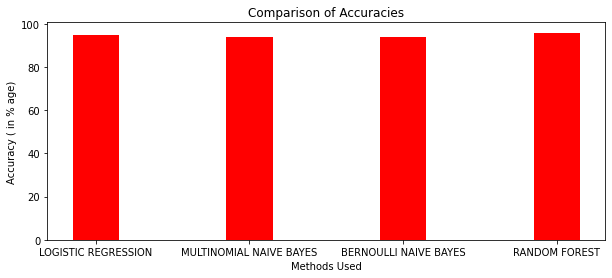

In [42]:
data = {'LOGISTIC REGRESSION':94.75, 'MULTINOMIAL NAIVE BAYES':94.11, 'BERNOULLI NAIVE BAYES':94.01,  
        'RANDOM FOREST':95.98} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 4)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='red',  
        width = 0.3) 
  
plt.xlabel("Methods Used") 
plt.ylabel("Accuracy ( in % age)") 
plt.title("Comparison of Accuracies") 
plt.show() 